In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plot figures
import seaborn as sns # plot figures
import plotly.express as px
from datetime import datetime
from collections import Counter
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
from statistics import mean, median, stdev, variance
import glob
import os
import math
import random
import time
import warnings
warnings.filterwarnings('ignore') 

In [2]:
file_path = "D:\\Jupyter-workspace\\PCCM Manuscript_Data Description\\b_Assign Diagnosis Groups\\"

In [3]:
df = pd.read_csv(file_path+"df_monitor_patients.csv")
print(len(df))

1711


In [4]:
# local file path
path=r'D:\00_UCL_Z-score_Data_Files'

In [5]:
# read all csv files from path folder
numerical_CSV_files = glob.glob(os.path.join(path, "*.csv"))

In [6]:
# print total number of files
len(numerical_CSV_files)

1781

In [7]:
df.head(3)

,Unnamed: 0,Unnamed: 0.1,cats_id,gender,weight_kg,age_mon,referral_outcome_datetime,referring_unit,primary_diagnosis,diagnosis_group,...,c_abpSys,c_nbpMean,c_nbpDia,c_nbpSys,c_nPleth,c_ecgRate,c_nPoxy,key_vital_sign_count,total_transport_time,Diagnosis_Group
0,0,0,30006,Female,3.30,2.0,01/07/2016 18:37,Lister Hospital-(RWH01),Atrioventricular septal defect: atrial and ven...,NaN,...,0,5115,5115,5115,5771,6046,0,0,225,Cardiovascular
1,1,1,30008,Male,3.92,0.0,01/07/2016 21:50,Luton and Dunstable Hospital-(RC971),Coarctation of aorta,NaN,...,0,4944,4944,4944,5698,5576,0,0,225,Cardiovascular
2,2,2,30013,Male,2.20,2.0,02/07/2016 23:45,Homerton University Hospital-(RQXM1),Lower respiratory tract infection,NaN,...,0,2224,2224,2225,2260,2410,0,0,200,Respiratory


In [8]:
df['InvasiveVentilation'] = df['ventilation_status'].apply(lambda x: 'Yes' if 'Invasive' in x else 'No')

In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'cats_id', 'gender', 'weight_kg',
       'age_mon', 'referral_outcome_datetime', 'referring_unit',
       'primary_diagnosis', 'diagnosis_group', 'preexisting_conditions',
       'ventilation_status', 'vasoactive_agent_used', 'vasoactive_agent_name',
       'inhaled_no', 'arrive_collunit', 'depart_destunit', 'cats_interv',
       'local_interv', 'pim3', 'transport_team_in_attendance',
       'referral_datetime', 'referral_outcome', 'critical_incident',
       'incident_type', 'csv_files', 'min_session_time', 'max_session_time',
       'start_datetime', 'end_datetime', 'length_of_stay',
       'length_of_icu_stay', 'deceased_flag', 'sex', 'ethnicity_nat_code',
       'ethnicity_name', 'age_at_admission', 'age_at_death',
       'Destination Unit', 'Destination Care Area', 'Depart Collection Unit',
       'Arrive Destination Unit', 'dest_is_GOSH',
       'CI_Patient_Equipment_Related', 'CI_Patient_Related',
       'CI_Ambulance_Related', 'CI_Equipment_

In [10]:
df1 = df.loc[df['Diagnosis_Group'] == 'Respiratory']
df1.head(3)[['cats_id','Diagnosis_Group']]

,cats_id,Diagnosis_Group
2,30013,Respiratory
3,30018,Respiratory
4,30024,Respiratory


In [11]:
df_ECG_Respiratory = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df1[df1['c_ecgRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['necgRate'] == df_data['necgRate']]
        #df_data = df_data[df_data['necgRate'] != 0]
        ECG = df_data['necgRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_ECG_Respiratory.extend(ECG)

In [12]:
df_RR_Respiratory_noninvasive = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    RR_df = df1[df1['InvasiveVentilation']=='No']
    if cats_id in RR_df[RR_df['c_respRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nrespRate'] == df_data['nrespRate']]
        #df_data = df_data[df_data['nrespRate'] != 0]
        ECG = df_data['nrespRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_RR_Respiratory_noninvasive.extend(ECG)

In [13]:
df_RR_Respiratory_invasive = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    RR_df = df1[df1['InvasiveVentilation']=='Yes']
    if cats_id in RR_df[RR_df['c_respRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nrespRate'] == df_data['nrespRate']]
        df_data = df_data[df_data['nrespRate'] != 0]
        ECG = df_data['nrespRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_RR_Respiratory_invasive.extend(ECG)

In [14]:
df_SBP_Respiratory= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df1[df1['c_nbpSys'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpSys'] == df_data['nnbpSys']]
        #df_data = df_data[df_data['nnbpSys'] != 0]
        ECG = df_data['nnbpSys'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SBP_Respiratory.extend(ECG)

In [15]:
df_DBP_Respiratory= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df1[df1['c_nbpDia'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpDia'] == df_data['nnbpDia']]
        #df_data = df_data[df_data['nnbpDia'] != 0]
        ECG = df_data['nnbpDia'].tolist()[0:600]
        # extract ECG value that is not nan
        df_DBP_Respiratory.extend(ECG)

In [16]:
df_MBP_Respiratory= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df1[df1['c_nbpMean'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpMean'] == df_data['nnbpMean']]
        #df_data = df_data[df_data['nnbpMean'] != 0]
        ECG = df_data['nnbpMean'].tolist()[0:600]
        # extract ECG value that is not nan
        df_MBP_Respiratory.extend(ECG)

In [17]:
df2 = df.loc[df['Diagnosis_Group'] == 'Cardiovascular']
df2.head(3)[['cats_id','Diagnosis_Group']]

,cats_id,Diagnosis_Group
0,30006,Cardiovascular
1,30008,Cardiovascular
10,30046,Cardiovascular


In [18]:
df_ECG_cardio= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df2[df2['c_ecgRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['necgRate'] == df_data['necgRate']]
        #df_data = df_data[df_data['necgRate'] != 0]
        ECG = df_data['necgRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_ECG_cardio.extend(ECG)

In [19]:
df_RR_cardio_noninvasive = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    RR_df = df2[df2['InvasiveVentilation']=='No']
    if cats_id in RR_df[RR_df['c_respRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nrespRate'] == df_data['nrespRate']]
        #df_data = df_data[df_data['nrespRate'] != 0]
        ECG = df_data['nrespRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_RR_cardio_noninvasive.extend(ECG)

In [20]:
df_RR_cardio_invasive = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    RR_df = df2[df2['InvasiveVentilation']=='Yes']
    if cats_id in RR_df[RR_df['c_respRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nrespRate'] == df_data['nrespRate']]
        #df_data = df_data[df_data['nrespRate'] != 0]
        ECG = df_data['nrespRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_RR_cardio_invasive.extend(ECG)

In [21]:
df_MBP_cardio= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df2[df2['c_nbpMean'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpMean'] == df_data['nnbpMean']]
        #df_data = df_data[df_data['nnbpMean'] != 0]
        ECG = df_data['nnbpMean'].tolist()[0:600]
        # extract ECG value that is not nan
        df_MBP_cardio.extend(ECG)

In [22]:
df_SBP_cardio= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df2[df2['c_nbpSys'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpSys'] == df_data['nnbpSys']]
        #df_data = df_data[df_data['nnbpSys'] != 0]
        ECG = df_data['nnbpSys'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SBP_cardio.extend(ECG)

In [23]:
df_DBP_cardio= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df2[df2['c_nbpDia'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpDia'] == df_data['nnbpDia']]
        #df_data = df_data[df_data['nnbpDia'] != 0]
        ECG = df_data['nnbpDia'].tolist()[0:600]
        # extract ECG value that is not nan
        df_DBP_cardio.extend(ECG)

In [24]:
df3 = df.loc[df['Diagnosis_Group'] == 'Neurological']
df3.head(3)[['cats_id','Diagnosis_Group']]

,cats_id,Diagnosis_Group
15,30082,Neurological
27,30201,Neurological
29,30235,Neurological


In [25]:
df_ECG_neuro= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df3[df3['c_ecgRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['necgRate'] == df_data['necgRate']]
        #df_data = df_data[df_data['necgRate'] != 0]
        ECG = df_data['necgRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_ECG_neuro.extend(ECG)

In [26]:
df_RR_neuro_noninvasive = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    RR_df = df3[df3['InvasiveVentilation']=='No']
    if cats_id in RR_df[RR_df['c_respRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nrespRate'] == df_data['nrespRate']]
        #df_data = df_data[df_data['nrespRate'] != 0]
        ECG = df_data['nrespRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_RR_neuro_noninvasive.extend(ECG)

In [27]:
df_RR_neuro_invasive = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    RR_df = df3[df3['InvasiveVentilation']=='Yes']
    if cats_id in RR_df[RR_df['c_respRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nrespRate'] == df_data['nrespRate']]
        #df_data = df_data[df_data['nrespRate'] != 0]
        ECG = df_data['nrespRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_RR_neuro_invasive.extend(ECG)

In [28]:
df_SBP_neuro= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df3[df3['c_nbpSys'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpSys'] == df_data['nnbpSys']]
        #df_data = df_data[df_data['nnbpSys'] != 0]
        ECG = df_data['nnbpSys'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SBP_neuro.extend(ECG)

In [29]:
df_DBP_neuro= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df3[df3['c_nbpDia'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpDia'] == df_data['nnbpDia']]
        #df_data = df_data[df_data['nnbpDia'] != 0]
        ECG = df_data['nnbpDia'].tolist()[0:600]
        # extract ECG value that is not nan
        df_DBP_neuro.extend(ECG)

In [30]:
df_MBP_neuro= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df3[df3['c_nbpMean'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpMean'] == df_data['nnbpMean']]
        #df_data = df_data[df_data['nnbpMean'] != 0]
        ECG = df_data['nnbpMean'].tolist()[0:600]
        # extract ECG value that is not nan
        df_MBP_neuro.extend(ECG)

In [31]:
df4 = df.loc[df['Diagnosis_Group'] == 'Infection']
df4.head(3)[['cats_id','Diagnosis_Group']]

,cats_id,Diagnosis_Group
14,30077,Infection
51,30386,Infection
53,30400,Infection


In [32]:
df_ECG_infection= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df4[df4['c_ecgRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['necgRate'] == df_data['necgRate']]
        #df_data = df_data[df_data['necgRate'] != 0]
        ECG = df_data['necgRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_ECG_infection.extend(ECG)

In [33]:
df_RR_infection_noninvasive = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    RR_df = df4[df4['InvasiveVentilation']=='No']
    if cats_id in RR_df[RR_df['c_respRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nrespRate'] == df_data['nrespRate']]
        #df_data = df_data[df_data['nrespRate'] != 0]
        ECG = df_data['nrespRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_RR_infection_noninvasive.extend(ECG)

In [34]:
df_RR_infection_invasive = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    RR_df = df4[df4['InvasiveVentilation']=='Yes']
    if cats_id in RR_df[RR_df['c_respRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nrespRate'] == df_data['nrespRate']]
        #df_data = df_data[df_data['nrespRate'] != 0]
        ECG = df_data['nrespRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_RR_infection_invasive.extend(ECG)

In [35]:
df_SBP_infection= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df4[df4['c_nbpSys'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpSys'] == df_data['nnbpSys']]
        #df_data = df_data[df_data['nnbpSys'] != 0]
        ECG = df_data['nnbpSys'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SBP_infection.extend(ECG)

In [36]:
df_DBP_infection= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df4[df4['c_nbpDia'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpDia'] == df_data['nnbpDia']]
        #df_data = df_data[df_data['nnbpDia'] != 0]
        ECG = df_data['nnbpDia'].tolist()[0:600]
        # extract ECG value that is not nan
        df_DBP_infection.extend(ECG)

In [37]:
df_MBP_infection= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df4[df4['c_nbpMean'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpMean'] == df_data['nnbpMean']]
        #df_data = df_data[df_data['nnbpMean'] != 0]
        ECG = df_data['nnbpMean'].tolist()[0:600]
        # extract ECG value that is not nan
        df_MBP_infection.extend(ECG)

In [38]:
df5 = df.loc[df['Diagnosis_Group'] == 'Gastrointestinal']
df5.head(3)[['cats_id','Diagnosis_Group']]

,cats_id,Diagnosis_Group
12,30055,Gastrointestinal
16,30086,Gastrointestinal
24,30127,Gastrointestinal


In [39]:
df_ECG_gastro= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df5[df5['c_ecgRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['necgRate'] == df_data['necgRate']]
        #df_data = df_data[df_data['necgRate'] != 0]
        ECG = df_data['necgRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_ECG_gastro.extend(ECG)

In [40]:
df_RR_gastro_noninvasive = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    RR_df = df5[df5['InvasiveVentilation']=='No']
    if cats_id in RR_df[RR_df['c_respRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nrespRate'] == df_data['nrespRate']]
        df_data = df_data[df_data['nrespRate'] != 0]
        ECG = df_data['nrespRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_RR_gastro_noninvasive.extend(ECG)

In [41]:
df_RR_gastro_invasive = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    RR_df = df5[df5['InvasiveVentilation']=='Yes']
    if cats_id in RR_df[RR_df['c_respRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nrespRate'] == df_data['nrespRate']]
        #df_data = df_data[df_data['nrespRate'] != 0]
        ECG = df_data['nrespRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_RR_gastro_invasive.extend(ECG)

In [42]:
df_SBP_gastro= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df5[df5['c_nbpSys'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpSys'] == df_data['nnbpSys']]
        #df_data = df_data[df_data['nnbpSys'] != 0]
        ECG = df_data['nnbpSys'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SBP_gastro.extend(ECG)

In [43]:
df_DBP_gastro= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df5[df5['c_nbpDia'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpDia'] == df_data['nnbpDia']]
        #df_data = df_data[df_data['nnbpDia'] != 0]
        ECG = df_data['nnbpDia'].tolist()[0:600]
        # extract ECG value that is not nan
        df_DBP_gastro.extend(ECG)

In [44]:
df_MBP_gastro= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df5[df5['c_nbpMean'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpMean'] == df_data['nnbpMean']]
        #df_data = df_data[df_data['nnbpMean'] != 0]
        ECG = df_data['nnbpMean'].tolist()[0:600]
        # extract ECG value that is not nan
        df_MBP_gastro.extend(ECG)

In [45]:
df6 = df.loc[df['Diagnosis_Group'] == 'Trauma']
df6.head(3)[['cats_id','Diagnosis_Group']]

,cats_id,Diagnosis_Group
5,30026,Trauma
69,30466,Trauma
136,31513,Trauma


In [46]:
df_ECG_trauma= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df6[df6['c_ecgRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['necgRate'] == df_data['necgRate']]
        df_data = df_data[df_data['necgRate'] != 0]
        ECG = df_data['necgRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_ECG_trauma.extend(ECG)

In [47]:
df_RR_trauma_noninvasive = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    RR_df = df6[df6['InvasiveVentilation']=='No']
    if cats_id in RR_df[RR_df['c_respRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nrespRate'] == df_data['nrespRate']]
        df_data = df_data[df_data['nrespRate'] != 0]
        ECG = df_data['nrespRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_RR_trauma_noninvasive.extend(ECG)

In [48]:
df_RR_trauma_invasive = list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    RR_df = df6[df6['InvasiveVentilation']=='Yes']
    if cats_id in RR_df[RR_df['c_respRate'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nrespRate'] == df_data['nrespRate']]
        df_data = df_data[df_data['nrespRate'] != 0]
        ECG = df_data['nrespRate'].tolist()[0:600]
        # extract ECG value that is not nan
        df_RR_trauma_invasive.extend(ECG)

In [49]:
df_SBP_trauma= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df6[df6['c_nbpSys'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpSys'] == df_data['nnbpSys']]
        df_data = df_data[df_data['nnbpSys'] != 0]
        ECG = df_data['nnbpSys'].tolist()[0:600]
        # extract ECG value that is not nan
        df_SBP_trauma.extend(ECG)

In [50]:
df_DBP_trauma= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df6[df6['c_nbpDia'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpDia'] == df_data['nnbpDia']]
        #df_data = df_data[df_data['nnbpDia'] != 0]
        ECG = df_data['nnbpDia'].tolist()[0:600]
        # extract ECG value that is not nan
        df_DBP_trauma.extend(ECG)

In [52]:
len(numerical_CSV_files)

1781

In [53]:
df_MBP_trauma= list()
for i in range(0,len(numerical_CSV_files)):
    my_csv_file = numerical_CSV_files[i]
    cats_id = int(my_csv_file.split('\\')[2].split('_')[0])
    if cats_id in df6[df6['c_nbpMean'] >= 600].cats_id.tolist():
        df_data  = pd.read_csv(my_csv_file)
        df_data = df_data[df_data['nnbpMean'] == df_data['nnbpMean']]
        #df_data = df_data[df_data['nnbpMean'] != 0]
        ECG = df_data['nnbpMean'].tolist()[0:600]
        # extract ECG value that is not nan
        df_MBP_trauma.extend(ECG)

In [54]:
# https://stackoverflow.com/questions/18861075/overlaying-the-numeric-value-of-median-variance-in-boxplots
# 

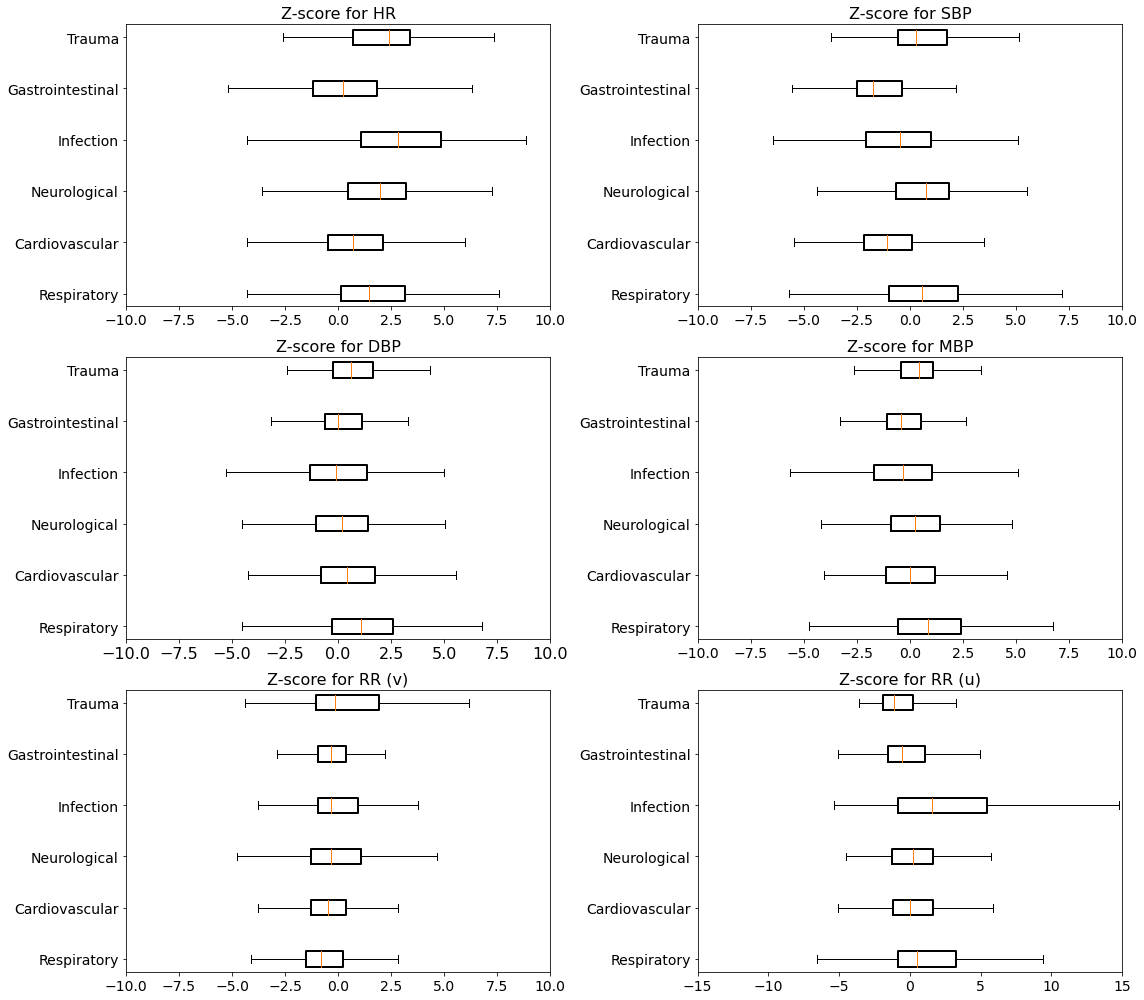

In [55]:
#fig = plt.figure() # create the canvas for plotting
f, ((ax1, ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(16,14))
ax1 = plt.subplot(3,2,1)
data = [df_ECG_Respiratory,df_ECG_cardio,df_ECG_neuro,df_ECG_infection,df_ECG_gastro,df_ECG_trauma]
ticks = ['Respiratory','Cardiovascular','Neurological','Infection','Gastrointestinal','Trauma']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-10,10)
plt.tight_layout()
ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation = 0, Fontsize=14)
ax1.set_yticklabels(labels=ax1.get_yticklabels(), Fontsize=14)
ax1.set_title('Z-score for HR', fontsize=16)

ax2 = plt.subplot(3,2,2)
data = [df_SBP_Respiratory,df_SBP_cardio,df_SBP_neuro,df_SBP_infection,df_SBP_gastro,df_SBP_trauma]
ticks = ['Respiratory','Cardiovascular','Neurological','Infection','Gastrointestinal','Trauma']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-10,10)
plt.tight_layout()
ax2.set_xticklabels(labels=ax2.get_xticklabels(), rotation = 0, Fontsize=14)
ax2.set_yticklabels(labels=ax2.get_yticklabels(), Fontsize=14)
ax2.set_title('Z-score for SBP', fontsize=16)

ax3 = plt.subplot(3,2,3)
data = [df_DBP_Respiratory,df_DBP_cardio,df_DBP_neuro,df_DBP_infection,df_DBP_gastro,df_DBP_trauma]
ticks = ['Respiratory','Cardiovascular','Neurological','Infection','Gastrointestinal','Trauma']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-10,10)
plt.tight_layout()
ax3.set_xticklabels(labels=ax3.get_xticklabels(), rotation = 0, Fontsize=16)
ax3.set_yticklabels(labels=ax3.get_yticklabels(), Fontsize=14)
ax3.set_title('Z-score for DBP', fontsize=16)


ax4 = plt.subplot(3,2,4)
data = [df_MBP_Respiratory,df_MBP_cardio,df_MBP_neuro,df_MBP_infection,df_MBP_gastro,df_MBP_trauma]
ticks = ['Respiratory','Cardiovascular','Neurological','Infection','Gastrointestinal','Trauma']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-10,10)
plt.tight_layout()
ax4.set_xticklabels(labels=ax4.get_xticklabels(), rotation = 0, Fontsize=14)
ax4.set_yticklabels(labels=ax4.get_yticklabels(), Fontsize=14)
ax4.set_title('Z-score for MBP', fontsize=16)


ax5 = plt.subplot(3,2,5)
data = [df_RR_Respiratory_invasive,df_RR_cardio_invasive,df_RR_neuro_invasive,df_RR_infection_invasive,df_RR_gastro_invasive,df_RR_trauma_invasive]
ticks = ['Respiratory','Cardiovascular','Neurological','Infection','Gastrointestinal','Trauma']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-10,10)
plt.tight_layout()
ax5.set_xticklabels(labels=ax5.get_xticklabels(), rotation = 0, Fontsize=14)
ax5.set_yticklabels(labels=ax5.get_yticklabels(), Fontsize=14)
ax5.set_title('Z-score for RR (v)', fontsize=16)


ax6 = plt.subplot(3,2,6)
data = [df_RR_Respiratory_noninvasive,df_RR_cardio_noninvasive,df_RR_neuro_noninvasive,df_RR_infection_noninvasive,df_RR_gastro_noninvasive,df_RR_trauma_noninvasive]
ticks = ['Respiratory','Cardiovascular','Neurological','Infection','Gastrointestinal','Trauma']
bpl = plt.boxplot(data, positions=np.array(range(len(data)))*2, widths=0.6,whis=1.5,boxprops= dict(linewidth=2.0),showfliers=False,vert=False)
plt.yticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-15,15)
plt.tight_layout()
ax6.set_xticklabels(labels=ax6.get_xticklabels(), rotation = 0, Fontsize=14)
ax6.set_yticklabels(labels=ax6.get_yticklabels(), Fontsize=14)
ax6.set_title('Z-score for RR (u)', fontsize=16)

plt.savefig('Fig1_Boxplot_Z-scores_HR_RR_BP_by_diagnosis.eps', format='eps')

In [56]:
# for line in bpl['medians']:
#     # get position data for median line
#     x, y = line.get_xydata()[1] # top of median line
#     # overlay median value
#     plt.text(x, y, '%.1f' % x,
#          horizontalalignment='center') # draw above, centered
# for line in bpl['boxes']:
#     x, y = line.get_xydata()[3] # bottom of left line
#     plt.text(x,y, '%.1f' % x,
#          horizontalalignment='center', # centered
#          verticalalignment='top')      # below
#     x, y = line.get_xydata()[6] # bottom of right line
#     plt.text(x,y, '%.1f' % x,
#          horizontalalignment='center', # centered
#              verticalalignment='top')      # below

# Check 50 Confidence Interval for Vital signs in the paper

In [57]:
### HR
# df_ECG_Respiratory,df_ECG_cardio,df_ECG_neuro,df_ECG_infection,df_ECG_gastro,df_ECG_trauma

In [58]:
np.percentile(df_ECG_Respiratory, [25, 50, 75])

array([0.15666667, 1.46222222, 3.13333333])

In [59]:
np.percentile(df_ECG_Respiratory, [25, 50, 75])

array([0.15666667, 1.46222222, 3.13333333])

In [60]:
np.percentile(df_ECG_cardio, [25, 50, 75])

array([-0.47 ,  0.705,  2.115])

In [61]:
np.percentile(df_ECG_neuro, [25, 50, 75])

array([0.47      , 1.95833333, 3.19323529])

In [62]:
np.percentile(df_ECG_infection, [25, 50, 75])

array([1.09666667, 2.83305556, 4.84842105])

In [63]:
np.percentile(df_ECG_gastro, [25, 50, 75])

array([-1.175     ,  0.235     ,  1.81815789])

In [64]:
np.percentile(df_ECG_trauma, [25, 50, 75])

array([0.69263158, 2.41911765, 3.37657895])